## 1. Обзор данных

В нашем распоряжении 5 датафреймов, назовем их следующим образом:
* `df_calls` - информация о звонках;
* `df_internet` - информация об интернет-сессиях;
* `df_messages` - информация о сообщениях;
* `df_tariffs` - информация о тарифах;
* `df_users` - информация о пользователях.
 
Откроем каждый из датафреймов и выведем общую информацию. Изучим их по-отдельности и напишем описание данных согласно полученной документации. В завершении напишем общий вывод.

In [1]:
# импортируем библиотеки необходимые для исследования

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import factorial
from scipy import stats as st


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# укажем путь к дф и назовем их как указали выше

try:
    df_calls = pd.read_csv('/datasets/calls.csv.')                 # информация о звонках
    df_internet = pd.read_csv('/datasets/internet.csv.')           # информация об интернет-сессиях
    df_messages = pd.read_csv('/datasets/messages.csv.')           # информация о сообщениях
    df_tariffs = pd.read_csv('/datasets/tariffs.csv.')             # информация о тарифах
    df_users = pd.read_csv('/datasets/users.csv.')                 # информация о пользователях
    
except: 
    df_calls = pd.read_csv('link to the file')                     # информация о звонках
    df_internet = pd.read_csv('link to the file')                  # информация об интернет-сессиях
    df_messages = pd.read_csv('link to the file')                  # информация о сообщениях
    df_tariffs = pd.read_csv('link to the file')                   # информация о тарифах
    df_users = pd.read_csv('link to the file')                     # информация о пользователях
    
    

**Изучим датафрейм `df_calls`.**

В нем содержится информация о звонках клиентов. Давайте ознакомимся с технической документацией, которую нам предоставил заказчик.


In [3]:
# выведем первые 5 строк дф и общую информацию

print('Информация о звонках:')
display(df_calls.head(5))
print()
print('Общая информация о таблице')
print()
df_calls.info()

Информация о звонках:


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000



Общая информация о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


**Описание данных:**

* `id` — уникальный номер звонка;
* `call_date` — дата звонка;
* `duration` — длительность звонка в минутах;
* `user_id` — идентификатор пользователя, сделавшего звонок.

**Итог по датафрейму**: 

* **202 607** строк и **4** столбца;
* пропущенных значений **нет**;
* название столбцов записано корректно;
* столбец `call_date` содержит дату, его следует перевести в формат **datetime**;
* столбец `duration` содержит длительность звонка, мы знаем, что «Мегалайн» всегда округляет секунды **до минут**, поэтому следует округлить до минут и можно поменять тип данных на **int**.

**Изучим датафрейм `df_internet`.**

В нем содержится информация об интернет-сессиях клиентов. Давайте ознакомимся с технической документацией, которую нам предоставил заказчик.



In [4]:
# выведем первые 5 строк дф и общую информацию

print('Информация об интернет-сессиях:')
display(df_internet.head(5))
print()
print('Общая информация о таблице')
print()
df_internet.info()

Информация об интернет-сессиях:


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000



Общая информация о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


**Описание данных:**

* `id` — уникальный номер сессии;
* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах);
* `session_date` — дата интернет-сессии;
* `user_id` — идентификатор пользователя.

* присутствует еще столбец `Unnamed: 0` (безымянный в переводе на русский) - его нет в описании данных, а содержит он в себе целые числа и чем-то похож на индексы.

**Итог по датафрейму**: 
* **149 396** строк и **5** столбцов;
* пропущенных значений **нет**;
* название столбоц написано корректно, за исключением "неопознаного" столбца `Unnamed: 0`;
* столбец `session_date` содержит дату, его следует перевести в формат **datetime**;
* столбец `mb_used` содержит данные о потраченом за сессию интернет-трафика (в мегабайтах), мы знаем, что «Мегалайн» общую сумму за месяц округляет до **гигабайт**, поэтому следует округлить до **гигабайт** и можно поменять тип данных на **int**.


**Изучим датафрейм `df_messages`.**

В нем содержится информация о сообщениях клиентов. Давайте ознакомимся с технической документацией, которую нам предоставил заказчик.



In [5]:
# выведем первые 5 строк дф и общую информацию

print('Информация о сообщениях:')
display(df_messages.head(5))
print()
print('Общая информация о таблице')
print()
df_messages.info()

Информация о сообщениях:


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000



Общая информация о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


**Описание данных:**

* `id` — уникальный номер сообщения;
* `message_date` — дата сообщения;
* `user_id` — идентификатор пользователя, отправившего сообщение.

**Итог по датафрейму**: 
* **123 036** строк и **3** столбцов;
* пропущенных значений **нет**;
* название столбоц написано корректно;
* столбец `message_date` содержит дату, его следует перевести в формат **datetime**;
* столбец `id` содержит уникальный номер сообщения абонента, мы можем перевести его в формат **int**.

**Изучим датафрейм `ds_tariffs`.**

В нем содержится информация о тарифах. Давайте ознакомимся с технической документацией, которую нам предоставил заказчик.



In [6]:
# выведем первые 5 строк дф и общую информацию

print('Информация о тарифах:')
display(df_tariffs.head(5))
print()
print('Общая информация о таблице')
print()
df_tariffs.info()

Информация о тарифах:


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra



Общая информация о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


**Описание данных:**

* `tariff_name` — название тарифа;
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях;
* `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату;
* `messages_included` — количество сообщений в месяц, включённых в абонентскую плату;
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах);
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата);
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета;
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта).

**Итог по датафрейму**: 
* **2** строки и **8** столбцов;
* пропущенных значений **нет**;
* название столбоц написано корректно.

**Изучим датафрейм `df_users`.**

В нем содержится информация о клиентах. Давайте ознакомимся с технической документацией, которую нам предоставил заказчик.



In [7]:
# выведем первые 5 строк дф и общую информацию


print('Информация о пользователях:')
display(df_users.head(5))
print()
print('Общая информация о таблице')
print()
df_users.info()

Информация о пользователях:


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra



Общая информация о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


**Описание данных:**

* `user_id` — уникальный идентификатор пользователя;
* `first_name` — имя пользователя;
* `last_name` — фамилия пользователя;
* `age` — возраст пользователя (годы);
* `reg_date` — дата подключения тарифа (день, месяц, год);
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных);
* `city` — город проживания пользователя;
* `tariff` — название тарифного плана.


**Итог по датафрейму**: 
* **500** строк и **8** столбцов;
* пропущенных значений **нет**, пропуски в столбце `churn_date` означают, что тариф ещё действовал на момент выгрузки данных;
* название столбоц написано корректно;
* столбецы `churn_date` и `reg_date` содержат дату, их следует перевести в формат **datetime**.

### Общий вывод:

У нас есть **5** датафреймов:

* **3** датафрейма из которых хранится информация о том, как клиенты пользуются своими тарифными планами (сколько звонков они совершили, сообщений отправили или интернета израсходовали), эта информация отражает каждый сделанный звонок, отправленное сообщение и каждую интернет-сессию.

* В **1** датафрейме представлена информация о самих клиентах: фамилия и имя, возраст, город проживания, дата подключения и отключения пакетов, а также название тарифного плана, которым они пользуются.

* Еще в **1** датафрейме представлена вся необходимая информация о исследуемых тарифных планов: их стоимость и лимиты пакетов.

У каждого клиента есть свой уникальный **id**, который указан в каждом датафрейме, за исключением информации о тарифных планах. По этому **id** можно понять какой именно пользователь, сколько данных израсходовал по своим пакетам. 

## 2. Предобработка данных

Проведя обзор данных мы выяснили, что в данных присутствуют пропуски в датафрейме **df_users**, в столбце `churn_date`, но заказчик предупредил нас, что если значение пропущено, то тариф ещё действовал на момент выгрузки данных, поэтому мы оставим их.

Далее мы обнаружили, что в некоторых столбцах лучше сменить тип данных, это столбцы с датами.

Дополнительно заказчик подсказал нам, что минуты и интернет трафик округляются к большему значению, после округления мы можем поменять тип данных на целочисленный и в этих столбцах. Единственное интернет-сессии округляются к большему значенич по-месячно, в то время как в минутах округляют каждый совершенный звонок. 

Хочу заметить, что для исследования нам не потребуются все данные, а только их часть и некоторую из этой части нам следует преобразовать, поэтому мы создадим новый датафрейм в который войдут только те данные, которе нам потребуются для исследования и в том формате, который нам необходим.

**Порядок действий:**
* 2.1: Изменим тип данных в столбцах с датой;
* 2.2: Округлим столбцы с минутамии в большую сторону и изменим тип данных в столбце;
* 2.3: Проверим данные на аномалии и избавимся от них если есть;
* 2.4: Проверим данные на дубликаты;
* 2.5: Создадим новый датафрейм, в который войдут только нужные для исследования данные;
* 2.6: Округлим данные об интернет-сессии в соответствии с условиями заказчика


### 2.1: Изменим тип данных в столбцах с датой

Изменим тип данных на **datetime** у следующих столбцов:
* датафрейм **df_calls** столбец `call_date`;
* датафрейм **df_internet** столбец `session_date`;
* датафрейм **df_messages** столбец `message_date`;
* датафрейм **df_users** столбец `churn_date` и `reg_date`.

In [8]:
# изменим в столбцах с датами тип данных на datetime

df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y.%m.%d')
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y.%m.%d')
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y.%m.%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y.%m.%d')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y.%m.%d')


### 2.2: Округлим столбцы с минутамии в большую сторону и изменим тип данных в столбце

«Мегалайн» всегда округляет секунды до минут. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута. 

В датафрейме **df_calls** в столбце `duration` округлим каждый звонок в большую сторону до минут, а затем переведем тип данных на **int**.

In [9]:
# округлим длительность звонков до минут и изветим тип данных на int

df_calls['duration'] = np.ceil(df_calls['duration']).astype('int')


### 2.3: Проверим данные на аномалии и избавимся от них если есть

Как мы уже отметили ранее для исследования нам потребуются не все данные, поэтому давайте проверим на аномалии следующие датафреймы и столбцы:

* В датафрейме **df_calls** проверим на аномалии столбцы: `call_date` и `duration`;
* В датафрейме **df_internet** проверим на аномалии столбцы: `session_date` и `mb_used`;
* В датафрейме **df_messages** проверим на аномалии столбцы: `message_date` и `id`;
* В датафрейме **df_users** проверим на аномалии столбцы: `age`, `churn_date`, `reg_date` и `city`.

Давайте еще раз повторим, что нам известно о выборке:

* мы исследуем **500** абонентов из разных городов и разного возраста;
* у нас есть данные по этим абонентам только за **2018** год;
* продолжительность звонков у нас в **минутах**;
* объём потраченного за сессию интернет-трафика представлен в **мегабайтах**;
* звонки с нулевой продолжительностью - не ошибка, а пропущенные звонки.

**В датафрейме df_calls проверим на аномалии столбцы: `call_date` и `duration`**

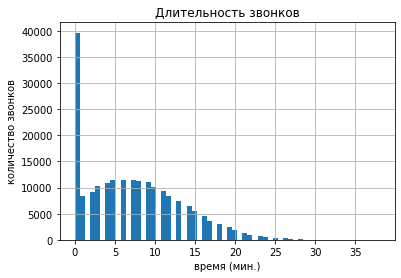

Обзор числовых характеристик столбца


count    202607.000000
mean          7.158198
std           5.959173
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          38.000000
Name: duration, dtype: float64

In [10]:
# изучем столбец с продолжительностью звонков

df_calls['duration'].hist(bins=60)
plt.title('Длительность звонков')
plt.xlabel('время (мин.)')
plt.ylabel('количество звонков')
plt.show()
print('Обзор числовых характеристик столбца')
df_calls['duration'].describe()

Мы знаем, что **0** минут - это пропущенные звонки, и их почти **40 000**, с учетом того, что это данные за всех пользователей, то эти значения кажутся нормальными. Но, на всякий случай, давайте проверим количество пропущенных звонков у каждого абонента отдельно.

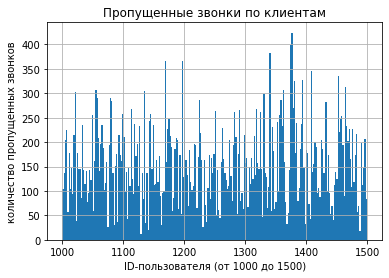

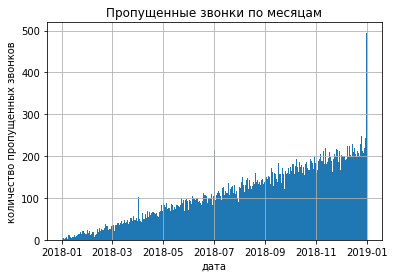

In [11]:
# построим гистограмму пропущенных звонков по клиентам и по дате

df_calls.query('duration == 0')['user_id'].hist(bins=250)
plt.title('Пропущенные звонки по клиентам')
plt.xlabel('ID-пользователя (от 1000 до 1500)')
plt.ylabel('количество пропущенных звонков')
plt.show()

df_calls.query('duration == 0')['call_date'].hist(bins=360)
plt.title('Пропущенные звонки по месяцам')
plt.xlabel('дата')
plt.ylabel('количество пропущенных звонков')
plt.show()

In [12]:
# взглянем на числовые характеристики столбца с датой

print('Обзор числовых характеристик столбца с датой')
df_calls['call_date'].describe()

Обзор числовых характеристик столбца с датой


count                  202607
unique                    365
top       2018-12-31 00:00:00
freq                     1435
first     2018-01-01 00:00:00
last      2018-12-31 00:00:00
Name: call_date, dtype: object

Наши опасения не подтвердились, пропущенные звонки рассортированы по всем пользователям, а их количество больше всего в конце года, к праздникам. Все это кажется довольно логичным.

Таким образом аномальных значений мы не обнаружили, максимальная продолжительность звонка - **38** минут,  а в среднем абоненты разговаривают **6-7** минут.
Даты тоже представлены только за **2018** год, как и указано в задании.

**В датафрейме df_internet проверим на аномалии столбцы: `session_date` и `mb_used`**

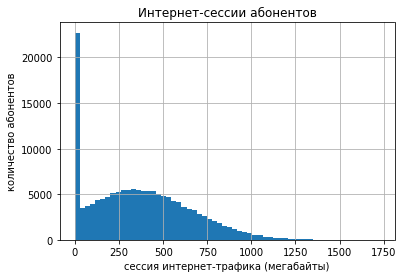

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

In [13]:
# изучем столбец с интернет-сесиями пользователей

df_internet['mb_used'].hist(bins=60)
plt.title('Интернет-сессии абонентов')
plt.xlabel('сессия интернет-трафика (мегабайты)')
plt.ylabel('количество абонентов')
plt.show()
df_internet['mb_used'].describe()

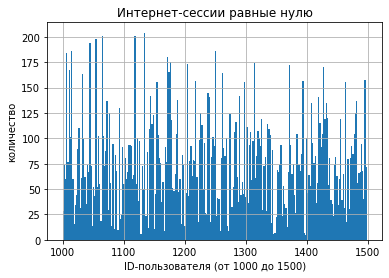

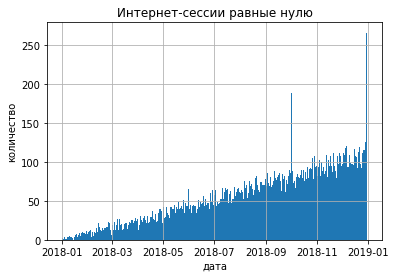

In [14]:
# построим гистограмму "нулевых" интернет-сессий по клиентам и по дате

df_internet.query('mb_used == 0')['user_id'].hist(bins=250)
plt.title('Интернет-сессии равные нулю')
plt.xlabel('ID-пользователя (от 1000 до 1500)')
plt.ylabel('количество')
plt.show()

df_internet.query('mb_used == 0')['session_date'].hist(bins=360)
plt.title('Интернет-сессии равные нулю')
plt.xlabel('дата')
plt.ylabel('количество')
plt.show()

In [15]:
# взглянем на числовые характеристики столбца с датой

print('Обзор числовых характеристик столбца с датой')
df_internet['session_date'].describe()

Обзор числовых характеристик столбца с датой


count                  149396
unique                    365
top       2018-12-31 00:00:00
freq                     1057
first     2018-01-01 00:00:00
last      2018-12-31 00:00:00
Name: session_date, dtype: object

Здесь ситуация схожая с продолжительностью, есть много "нулевых-сессий интернет трафика", мы построиди две гистограммы для них отдельно и обнаружили, что эти сессии присутствуют среди практически всех абонентов, и также к концу года их количество увеличевается, возможно из-за праздников. 

**В датафрейме df_messages проверим на аномалии столбцы: `message_date` и `id`**

In [16]:
# изучем столбец с сообщениями

(
df_messages
    .pivot_table(index='user_id', 
                 values='id', 
                 aggfunc='count')
    .sort_values(by='id',ascending=False)  
)

,id
user_id,
1277,1463
1089,1408
1231,1384
1385,1380
1356,1224
...,...
1389,6
1279,5
1074,3


**426** абонентов из 500 в течении года отправляли сообщения, все сообщения рассортированы среди абонентов, аномальных значений нет.

Давайте проверим дату.

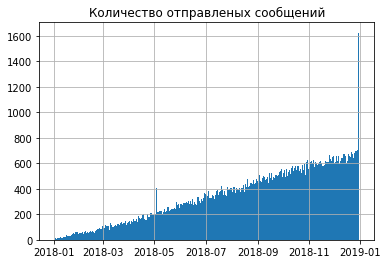

In [17]:
# построим гистограмму по дате и посмотрим период

df_messages['message_date'].hist(bins=360)
plt.title('Количество отправленых сообщений');

Ситуация как и раньше, к концу года сообщения увеличиются. 

**В датафрейме df_users проверим на аномалии столбцы: `age`, `churn_date`, `reg_date` и `city`**

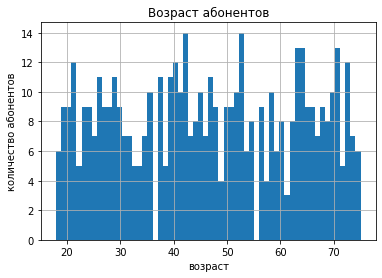

Обзор числовых характеристик столбца


count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

In [18]:
# проверим возраст абонентов и построим гистограмму

df_users['age'].hist(bins=60)
plt.title('Возраст абонентов')
plt.xlabel('возраст')
plt.ylabel('количество абонентов')
plt.show()

print('Обзор числовых характеристик столбца')
df_users['age'].describe()

Возраст абонентов в диапазоне **18 - 75** лет, здесь все логично. 

**Проверим даты**

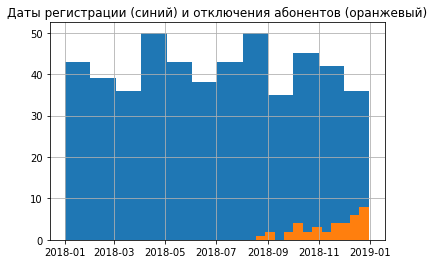

In [19]:
# проверим столбцы с датами

df_users['reg_date'].hist(bins=12)
df_users['churn_date'].hist(bins=12)
plt.title('Даты регистрации (синий) и отключения абонентов (оранжевый)')
plt.show;



Даты в этом датафрейме тоже представленны корректно.

**Проверим города**

In [20]:
# получим уникальные значения столбца

print('Выведим уникальные значения городов:')
df_users['city'].sort_values().unique()

Выведим уникальные значения городов:


array(['Архангельск', 'Астрахань', 'Балашиха', 'Барнаул', 'Белгород',
       'Брянск', 'Владивосток', 'Владикавказ', 'Владимир', 'Волгоград',
       'Волжский', 'Вологда', 'Воронеж', 'Грозный', 'Екатеринбург',
       'Иваново', 'Ижевск', 'Иркутск', 'Казань', 'Калининград', 'Калуга',
       'Кемерово', 'Киров', 'Кострома', 'Краснодар', 'Красноярск',
       'Курган', 'Курск', 'Липецк', 'Магнитогорск', 'Махачкала', 'Москва',
       'Мурманск', 'Набережные Челны', 'Нижневартовск', 'Нижний Новгород',
       'Нижний Тагил', 'Новокузнецк', 'Новороссийск', 'Новосибирск',
       'Омск', 'Оренбург', 'Орёл', 'Пенза', 'Пермь', 'Петрозаводск',
       'Подольск', 'Ростов-на-Дону', 'Рязань', 'Самара',
       'Санкт-Петербург', 'Саранск', 'Саратов', 'Севастополь', 'Смоленск',
       'Сочи', 'Ставрополь', 'Стерлитамак', 'Сургут', 'Тамбов', 'Тверь',
       'Тольятти', 'Томск', 'Тула', 'Тюмень', 'Улан-Удэ', 'Ульяновск',
       'Уфа', 'Хабаровск', 'Химки', 'Чебоксары', 'Челябинск', 'Череповец',
       'Чи

Города тоже записаны корректно и все они находятся на территории России.

### 2.4: Проверим данные на дубликаты

In [21]:
# проверим все датафреймы на наличик дубликатов

print('''
Проверим количество дубликатов в датафреймах:

df_calls - информация о звонках - количество дубликатов {0};
df_internet - информация об интернет-сессиях - количество дубликатов {1};
df_messages - информация о сообщениях - количество дубликатов {2};
df_tariffs - информация о тарифах - количество дубликатов {3};
df_users - информация о пользователях - количество дубликатов {4}.

'''.format(df_calls.duplicated().sum(), 
          df_internet.duplicated().sum(),
          df_messages.duplicated().sum(),
          df_tariffs.duplicated().sum(),
          df_users.duplicated().sum())
)


Проверим количество дубликатов в датафреймах:

df_calls - информация о звонках - количество дубликатов 0;
df_internet - информация об интернет-сессиях - количество дубликатов 0;
df_messages - информация о сообщениях - количество дубликатов 0;
df_tariffs - информация о тарифах - количество дубликатов 0;
df_users - информация о пользователях - количество дубликатов 0.




### 2.5: Создадим новый датафрейм, в который войдут только нужные для исследования данные

Нам нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше. Для этого у нас есть выборка из **500** абонентов, и детализация их расходов за **2018** год. Но, все данные разделены на 5 датафреймов, и для исследования нам этот формат будет не очень удобен. Поэтому я предлагаю создать новые датафреймы, которые затем войдут в один итоговый датафрейм, с которым мы и будем проводить исследование.

Мы сделаем следующее:

* создадим новый столбец `month` в датафреймах;
* создадим новый датафрейм **good_data** в который добавим все необходимые данные из **5** датафреймов;
* округлим интернет трафик, как нам подсказал заказчик до гигабайт;
* приведем тип данных в столбцах датафрейма **good_data** к нужным типам.


In [22]:
# добавим столбец 'month' 

df_calls['month'] = df_calls['call_date'].dt.month
df_internet['month'] = df_internet['session_date'].dt.month
df_messages['month'] = df_messages['message_date'].dt.month

In [23]:
# создадим дф good_data к которому присоеденим сгруппированую таблицу о звонках, в которой будет посчитаны 
# минуты за месяц по каждому абоненту
# присоеденим к good_data сгруппированую таблицу о сообщениях за месяц
# присоеденим к good_data сгруппированую таблицу об интернет-сессиях за месяц


# создаем новый дф на основе данных со звонками

good_data = (
    df_calls
    .groupby(['user_id', 'month'])
    .agg({'duration': ['count', 'sum']
         })
    .reset_index()
)

# у нас получились двух-уровневые названия столбцов, сразу переменцем их

good_data.columns = [ 'user_id', 'month', 'count_duration', 'sum_duration']

# добавим данные о сообщениях, мы делали срез по звонкам, поэтому тип соединения используем outer, чтобы никого не пропустить

good_data = (
    good_data
    .merge(df_messages
           .groupby(['user_id', 'month'])
           .agg({'id': 'count'})
           .reset_index(),
          on=['user_id', 'month'],
          how='outer')
)

# добавим данные об интернет-сессиях, тип соединения используем outer, чтобы никого не пропустить

good_data = (
    good_data
    .merge(df_internet
           .groupby(['user_id', 'month'])
           .agg({'mb_used': 'sum'})
           .reset_index(),
          on=['user_id', 'month'],
          how='outer',
                    )
)

# добавим данные об абонентах

good_data = (
    good_data
    .merge(df_users,
          on='user_id',
          how='left')
)

# удалим ненужные толбцы

good_data = good_data.drop(['churn_date', 'first_name', 'last_name', 'reg_date'], axis=1)

# переставим некоторые столбцы местами

good_data = good_data.reindex(columns=['user_id', 
                                       'city', 
                                       'age', 
                                       'month', 
                                       'count_duration', 
                                       'sum_duration', 
                                       'id', 
                                       'mb_used', 
                                       'tariff'
                                      ])

# изменим данные с интернет-сессией на ГБ, и округлим их в соответствии с условиями заказчика

good_data['mb_used'] = good_data['mb_used'] / 1024
good_data['mb_used'] = np.ceil(good_data['mb_used'])

# выведем на экран новый дф

good_data

,user_id,city,age,month,count_duration,sum_duration,id,mb_used,tariff
0,1000,Краснодар,52,5,22.0,159.0,22.0,3.0,ultra
1,1000,Краснодар,52,6,43.0,172.0,60.0,23.0,ultra
2,1000,Краснодар,52,7,47.0,340.0,75.0,14.0,ultra
3,1000,Краснодар,52,8,52.0,408.0,81.0,14.0,ultra
4,1000,Краснодар,52,9,58.0,466.0,57.0,15.0,ultra
...,...,...,...,...,...,...,...,...,...
3209,1489,Санкт-Петербург,35,9,NaN,NaN,32.0,17.0,smart
3210,1489,Санкт-Петербург,35,10,NaN,NaN,21.0,20.0,smart
3211,1489,Санкт-Петербург,35,11,NaN,NaN,20.0,18.0,smart
3212,1489,Санкт-Петербург,35,12,NaN,NaN,35.0,17.0,smart


Мы создали новый датафрейм **good_data** в который вошли необходимые нам данные о расходах по тарифному плану наших абонентов, давайте взглянем на общую информацию о таблице.

In [24]:
# выведем общую информацию о таблице

good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3214 non-null   int64  
 1   city            3214 non-null   object 
 2   age             3214 non-null   int64  
 3   month           3214 non-null   int64  
 4   count_duration  3174 non-null   float64
 5   sum_duration    3174 non-null   float64
 6   id              2717 non-null   float64
 7   mb_used         3203 non-null   float64
 8   tariff          3214 non-null   object 
dtypes: float64(4), int64(3), object(2)
memory usage: 251.1+ KB


В **good_data** у нас получилось **3 214** строки и **9** столбцов.

* мы видим пропущенные значения в столбцах: `count_duration`, `sum_duration`, `id` и `mb_used` - мы можем заполнить их нулевыми значениями, поскольку пропущенные звонки в таблице не учтены;
* некоторые столбцы лучше переименовать:
 * столбец `age` переменуем в `age_user`;
 * столбец `id` переменуем в `count_messages`;
 * столбец `mb_used` переменуем в `gb_used`.
* изменим тип данныех c **float** на **int**.

Давайте исправим все наши замечания, чтобы продолжать дальше.

In [25]:
# заполним пропущенные значения

good_data = good_data.fillna(0)

# переименуем некоторые столбцы

good_data = good_data.rename(
    columns = {
        'age': 'age_user',
        'id': 'count_messages',
        'mb_used': 'gb_used'
    }
)

# изменим тип данныех c float на int

good_data[['count_duration', 'sum_duration', 'count_messages', 'gb_used']] = (good_data[['count_duration', 
                                                                                         'sum_duration', 
                                                                                         'count_messages', 
                                                                                         'gb_used']]
                                                                              .astype('int') 
                                                                             )

# выведем на экран good_data

good_data

,user_id,city,age_user,month,count_duration,sum_duration,count_messages,gb_used,tariff
0,1000,Краснодар,52,5,22,159,22,3,ultra
1,1000,Краснодар,52,6,43,172,60,23,ultra
2,1000,Краснодар,52,7,47,340,75,14,ultra
3,1000,Краснодар,52,8,52,408,81,14,ultra
4,1000,Краснодар,52,9,58,466,57,15,ultra
...,...,...,...,...,...,...,...,...,...
3209,1489,Санкт-Петербург,35,9,0,0,32,17,smart
3210,1489,Санкт-Петербург,35,10,0,0,21,20,smart
3211,1489,Санкт-Петербург,35,11,0,0,20,18,smart
3212,1489,Санкт-Петербург,35,12,0,0,35,17,smart


Наша таблица почти готова, мы собрали всю необходимую информацию в ней о расходах пакетов услуг абонентов ежемесячно, дополнительно мы указали в ней: возраст и город проживания абонента.

Хочу дополнительно отметить, что в нашу таблицу не вошли пропущенные звонки, которые были отмечены **0** в продолжительности звонка, а все **нулевые значения** теперь говорят о том, что абонент не расходавал пакеты услуг в этом месяце (не тратил минуты, не отправлял сообщения или не расходовал интернет-трафик).

Исходя из вышесказанного давайте еще раз проверим наших абонентов, ведь это странно, если абонент в месяц не расходовал пакет услуг.

In [26]:
# проверим есть ли абоненты которые не пользовались своими пакетами услуг

print('''
Количество абонентов, которые не расходовали свой пакет услуг в месяц - {0} человек.'''
      
      .format(len(good_data.query('sum_duration == 0 and  count_messages == 0 and gb_used == 0')))
)


Количество абонентов, которые не расходовали свой пакет услуг в месяц - 0 человек.


Давайте еще раз вспомним нашу главную задачу: `чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.`

Для этого нам необходим еще один столбец, в котором будет расчитана ежемесячная выручка с каждого абонента Для этого нам надо учесть абонентскую плату, все входящие пакеты в этот тариф и остаток.

Добавим новый столбец **`income`** - который укажет ежемесячный доход компании с каждого абонента.

In [27]:
# добавим новый столбец с ежемесячным доходом пока что запишем абонентскую плату

good_data['income'] = np.where(good_data['tariff'] == 'smart', 550, 1950)


# напишем 3 функции которая посчитает стоимость услуг сверх тарифного пакета




# первая функция считатет стоимость услуг сверх тарифного пакета за минуты

def income_minute(row):
    tariff = row['tariff']
    income = row['income']
    user_duration = row['sum_duration']
    
    # пишем условия для тарифа "Смарт"
    
    if tariff == 'smart':
        
        smart_limite_minute = 500         # количество минут включенных в тариф 'Смарт'
        smart_price_minute = 3            # стоимость 1 минуты свер-пакета тарифа "Смарт"
        
        if user_duration > smart_limite_minute:
            return income + ((user_duration - smart_limite_minute) * smart_price_minute)
            
        else:
            return income
        
    # пишем условия для тарифа "Ультра"
        
    elif tariff == 'ultra':
        
        ultra_limite_minute = 3000       # количество минут включенных в тариф 'Ультра'
        ultra_price_minute = 1           # стоимость 1 минуты свер-пакета тарифа "Ультра"
        
        if user_duration > ultra_limite_minute:
            return income + ((user_duration - ultra_limite_minute) * ultra_price_minute)            
        else:
            return income
        
    else:
        return 'неизвестный тариф'    
    
    
    
    
# вторая функция считатет стоимость услуг сверх тарифного пакета за сообщения    
    
    
def income_messages(row):
    tariff = row['tariff']
    income = row['income']
    user_messages = row['count_messages']
    
    # пишем условия для тарифа "Смарт"
    
    if tariff == 'smart':
        
        smart_limite_message = 50             # количество сообщений включенных в тариф 'Смарт'
        smart_price_message = 3               # стоимость 1 сообщения свер-пакета тарифа "Смарт"
        
        if user_messages > smart_limite_message:
            return income + ((user_messages - smart_limite_message) * smart_price_message)            
        else:
            return income
        
    # пишем условия для тарифа "Ультра"
        
    elif tariff == 'ultra':
        
        ultra_limite_message = 1000           # количество сообщений включенных в тариф 'Ультра'
        ultra_price_message = 1               # стоимость 1 сообщения свер-пакета тарифа "Ультра"
        
        if user_messages > ultra_limite_message:
            return income + ((user_messages - ultra_limite_message) * ultra_price_message)            
        else:
            return income
        
    else:
        return 'неизвестный тариф'
         
        
        
            
# третсья функция считатет стоимость услуг сверх тарифного пакета за интернет                                  
            
def income_internet(row):
    tariff = row['tariff']
    income = row['income']
    user_internet = row['gb_used']
    
    # пишем условия для тарифа "Смарт"
    
    if tariff == 'smart':
        
        smart_limite_internet = 15             # количество Гб включенных в тариф 'Смарт'
        smart_price_internet = 200             # стоимость 1Гб свер-пакета тарифа "Смарт"
        
        if user_internet > smart_limite_internet:
            return income + ((user_internet - smart_limite_internet) * smart_price_internet)            
        else:
            return income
        
    # пишем условия для тарифа "Ультра"

    elif tariff == 'ultra':
        
        ultra_limite_internet = 30             # количество Гб включенных в тариф 'Ультра'
        ultra_price_internet = 150             # стоимость 1Гб свер-пакета тарифа "Ультра"
        
        if user_internet > ultra_limite_internet:
            return income + ((user_internet - ultra_limite_internet) * ultra_price_internet)            
        else:
            return income
        
    else:
        return 'неизвестный тариф'


    
    
    
# применяем все три функции к столбцу 'income'    
    
good_data['income'] = good_data.apply(income_minute, axis=1)
good_data['income'] = good_data.apply(income_messages, axis=1)
good_data['income'] = good_data.apply(income_internet, axis=1)

# выведем на экран good_data

good_data

,user_id,city,age_user,month,count_duration,sum_duration,count_messages,gb_used,tariff,income
0,1000,Краснодар,52,5,22,159,22,3,ultra,1950
1,1000,Краснодар,52,6,43,172,60,23,ultra,1950
2,1000,Краснодар,52,7,47,340,75,14,ultra,1950
3,1000,Краснодар,52,8,52,408,81,14,ultra,1950
4,1000,Краснодар,52,9,58,466,57,15,ultra,1950
...,...,...,...,...,...,...,...,...,...,...
3209,1489,Санкт-Петербург,35,9,0,0,32,17,smart,950
3210,1489,Санкт-Петербург,35,10,0,0,21,20,smart,1550
3211,1489,Санкт-Петербург,35,11,0,0,20,18,smart,1150
3212,1489,Санкт-Петербург,35,12,0,0,35,17,smart,950


Итак, для дальнейшего исследования мы подготовили новый датафрейм **good_data** в который у нас вошли все нам необходимые данные и эти данные мы привели к нужному нам типу и формату.

Прежде чем двигаться дальше, давайте сделаем описание нового датафрейма, вдруг в будущем с ним будут еще работать.

**Описание данных датафрейма good_data:** 

* данная таблица содержит информацию о доходах компании за 2018 год!

* `user_id` - уникальный идентификатор пользователя (подробная информация о пользователи хранится в датафрейме **df_users**);
* `city` - город проживания пользователя (подробная информация о пользователи хранится в датафрейме **df_users**);
* `age_user` - возраст пользователя (годы), (подробная информация о пользователи хранится в датафрейме **df_users**);
* `month` - месяц пользования услугами оператора за 2018 год;
* `count_duration` - количество совершенных звонков в месяц за 2018 год, дополнительная информация о звонках хранится в датафрейме **df_calls**;
* `sum_duration` - сумма потраченных минут в месяц за 2018 год с округлением в большую сторону в соответствии с политикой оператора, дополнительная информация о звонках хранится в датафрейме **df_calls**;
* `count_messages` - количество отправленных сообщений в месяц за 2018 год, дополнительная информация о сообщениях хранится в датафрейме **df_messages**;
* `gb_used` - объём потраченного за месяц интернет-трафика (в гигабайтах) с округлением в большую сторону в соответствии с политикой оператора, дополнительная информация об интернет-трафике хранится в датафрейме **df_internet**;
* `tariff` - тарифный план оператора (доступна 2 тарифных плана: "Смарт" и "Ультра"), дополнительная информация о тарифных планах хранится в датафрейме **df_tariff**;
* `income` - ежемесячная выручка с абонента (руб.) (абонентская плата по тарифу + стоимость услуг сверх тарифного пакета), дополнительная информация о тарифных планах хранится в датафрейме **df_tariff** .



## 3. Анализ данных

Мы подготовили данные для анализы, теперь давайте выясним поведение клиентов оператора, исходя из выборки:

* сколько минут разговора требуется пользователям каждого тарифа в месяц?
* сколько сообщений требуется пользователям каждого тарифа в месяц?
* какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
* рассчитаем среднее количество, дисперсию и стандартное отклонение;
* построим гистограммы;
* опишите распределения.


**Давайте для начала узнаем сколько абонентов из нашей выборке подключены к этим тарифам.**



Таблица с количеством абонентов по тарифам:


,user_id
tariff,
smart,350
ultra,148


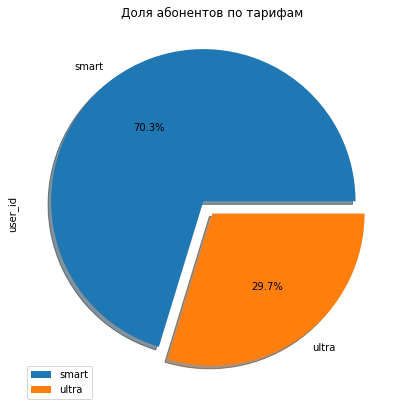

In [28]:
# подсчитаем общее число абонентов по тарифам и построим круговую диграмму, что узнать долю абонентов по тарифам

print('Таблица с количеством абонентов по тарифам:')
display(good_data.groupby('tariff').agg({'user_id': 'nunique'}))


(
good_data
    .groupby('tariff')
    .agg({'user_id': 'nunique'})
    .plot(kind='pie',
          figsize=(7, 7),
          subplots=True, 
          autopct='%1.1f%%',
          explode = [0.1, 0],
          shadow = True
          )    
)
# plt.legend(title = "Названия тарифов:", loc=1) данная строка начала приводить к ошибке 'tuple' object is not callable
plt.title('Доля абонентов по тарифам');

Таким образом мы видим, что количество абонентов у нас получается **498**. Из них **большая часть** пользуется тарифом **"Смарт"**, а лишь **30%** использует более дорогой тариф **"Ультра"**.

**Давайте изучим возраст абонентов.**

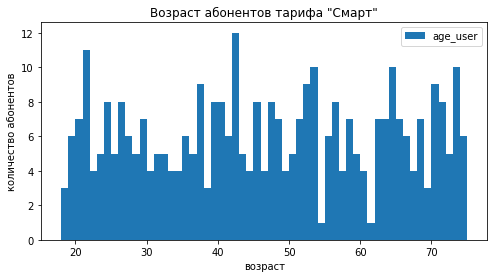

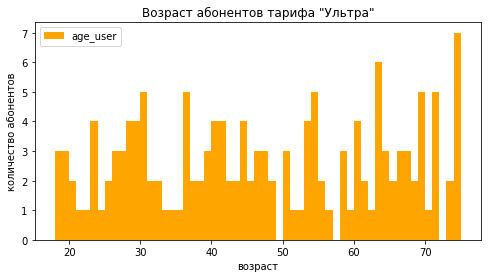

In [29]:
# построим 2 гистограммы по тарифам в которой увидем возраст абонентов

(
good_data
    .query('tariff == "smart"')
    .pivot_table(
        index='user_id', 
        values='age_user', 
        aggfunc='first')
    .plot(
        kind='hist', 
        bins=57, 
        alpha=1,
        figsize=(8, 4)
    ) 
)
plt.title('Возраст абонентов тарифа "Смарт"')
plt.xlabel('возраст')
plt.ylabel('количество абонентов')
plt.show()

(
good_data
    .query('tariff == "ultra"')
    .pivot_table(
        index='user_id', 
        values='age_user', 
        aggfunc='first')
    .plot(
        kind='hist', 
        bins=57, 
        alpha=1, 
        color='orange',
        figsize=(8, 4)
    )
)
plt.title('Возраст абонентов тарифа "Ультра"')
plt.xlabel('возраст')
plt.ylabel('количество абонентов')
plt.show()

Каких-либо отличительнных особенностей в возрасте абонентав по тарифам мы не видим, у обоих тарифов примерный возраст абонентов **18 - 75** лет.

**Давайте изучим в каких городах проживают наши абоненты.**

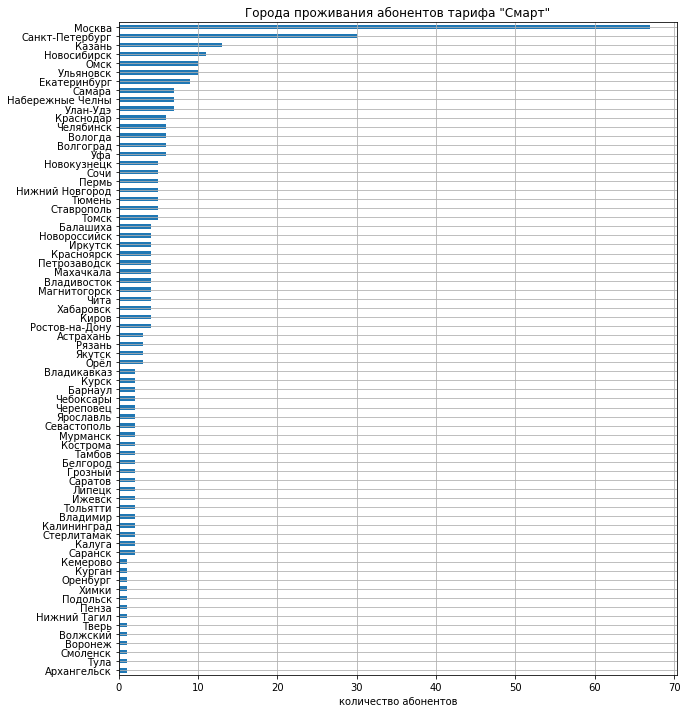

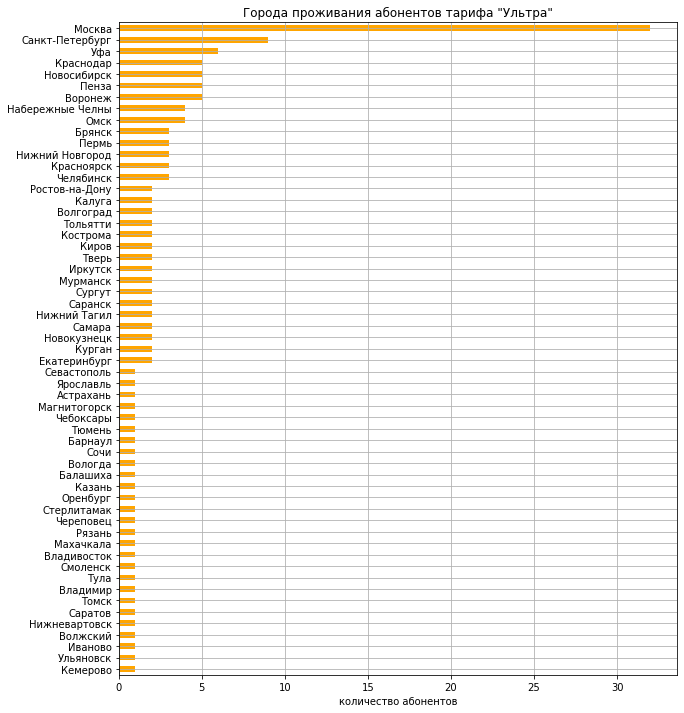

In [30]:
# построим столбчатые диограммы по тарифам посмотрим в каких городах проживают наши абоненты
# неразобрался как отразить на одной диаграмме оба тарифа

(
    df_users
    .query('tariff == "smart"')['city']
    .value_counts()
    .sort_values()
    .plot(
        kind='barh', 
        figsize=(10, 12), 
        grid=True)
)
plt.title('Города проживания абонентов тарифа "Смарт"')
plt.xlabel('количество абонентов')
plt.show()

(
    df_users
    .query('tariff == "ultra"')['city']
    .value_counts()
    .sort_values()
    .plot(
        kind='barh', 
        figsize=(10, 12), 
        grid=True,
        color='orange')
)
plt.title('Города проживания абонентов тарифа "Ультра"')
plt.xlabel('количество абонентов')
plt.show()

Здесь тоже без особых отличий, наибольшее число абонентов проживают в **Москве** и **Санкт-Петерурге**, в остальных городах значения различаются, но выборка слишком мала, чтобы о чем-то судить. 


Таким образом мы немного изучили наших аюонентов, теперь давайте перейдем к исследованию и ответим на следующие вопросы:
* сколько минут разговора требуется пользователям каждого тарифа в месяц?
* сколько сообщений требуется пользователям каждого тарифа в месяц?
* какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
* рассчитаем среднее количество, дисперсию и стандартное отклонение;
* построим гистограммы;
* опишите распределения.

Давайте попытаемся ответить на все эти вопросы и проведем статистический анализ данных, для этого найдем среднее по этим тарифам и вычислим среднее отклонение, благодаря этим знаниям мы сможем ответить на данные вопросы. 

**План статистического анализа данных:**
* создадим 2 дф **smart** и **ultra** в которых рассчитаем среднее, дисперсию и стандартное отклонение, для: минут, сообщений, интернет-сессиий и дохода;
* построим гистограммы по месяцам и по тарифам, для: минут, сообщений, интернет-сессиий;
* опишем распределение.

Создадим 2 дф **smart** и **ultra**

In [31]:
# для удобства создадим 2 дф в которых рассчитаем ср, дисп, и стд откл и по ним будем строить гистограммы

smart = (
    good_data
    .query('tariff=="smart"')
    .pivot_table(index='month', 
                 values=['sum_duration', 
                         'count_messages', 
                         'gb_used'],
                 aggfunc=['mean', 'var', 'std']
                
                )
        
        )

ultra = (
    good_data
    .query('tariff=="ultra"')
    .pivot_table(index='month', 
                 values=['sum_duration', 
                         'count_messages', 
                         'gb_used'],
                 aggfunc=['mean', 'var', 'std']
                
                )
        
        )

**Построим гистограммы для звонков**

Опираясь на 2 новых дф построим гистограмму для минут опираясь на среднее значение в месяц.

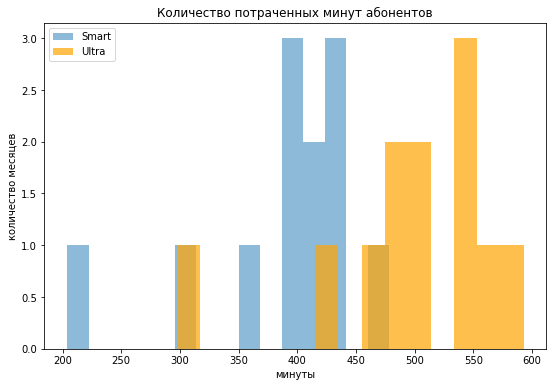

In [32]:
# построим гистограмму потраченных минут в среднем по месяцам у абонентов двух тарифов

plt.figure(figsize=(9,6))
plt.title('Количество потраченных минут абонентов')
plt.xlabel('минуты')
plt.ylabel('количество месяцев')

plt.hist(smart['mean']['sum_duration'],
        bins=15,
        alpha=.5,
        label='Smart'
        )

plt.hist(ultra['mean']['sum_duration'],
        bins=15,
        alpha=.7,
        color='orange',
        label='Ultra'
        )
plt.legend();


# пробовал через plot построить гистограмму, но появлялась ошибка Line2D
# поэтому гистограмма без дополнительных "украшений"   :(

Таким образом мы видим, что абоненты тарифного плана **Смарт** (синий цвет) расходуют меньше минут в месяц, чем абоненты **Ультра** (оранжевый цвет).
Видим, что обе гистограммы имеют датасет с небольшой отрицательнной скошенностью.

**Построим гистограммы для сообщений**

Опираясь на 2 новых дф построим гистограмму для сообщений опираясь на среднее значение в месяц.

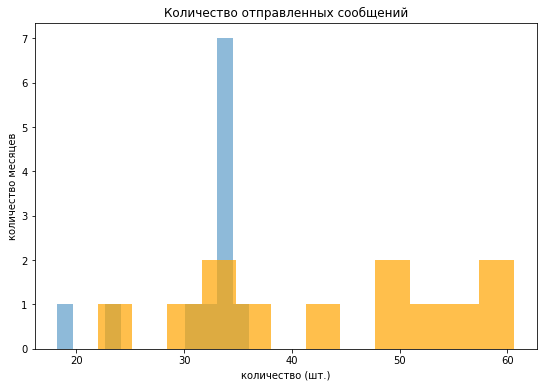

In [33]:
# построим гистограмму отправленных сообщений в среднем по месяцам у абонентов двух тарифов

plt.figure(figsize=(9,6))
plt.title('Количество отправленных сообщений')
plt.xlabel('количество (шт.)')
plt.ylabel('количество месяцев')

plt.hist(smart['mean']['count_messages'],
        bins=12,
        alpha=.5
        )

plt.hist(ultra['mean']['count_messages'],
        bins=12,
        alpha=.7,
        color='orange'
        );

Абоненты тарифного плана **Смарт** (синий цвет) отправляют меньше сообщений в месяц, чем абоненты **Ультра** (оранжевый цвет). Видим, что синяя гистограмма имеет небольшую отрицательнную скошенностью, а оранжевая практически симметрична.

**Построим гистограммы для интернет-сессий**

Опираясь на 2 новых дф построим гистограмму для интернет-сессий у абонентов опираясь на среднее значение в месяц.

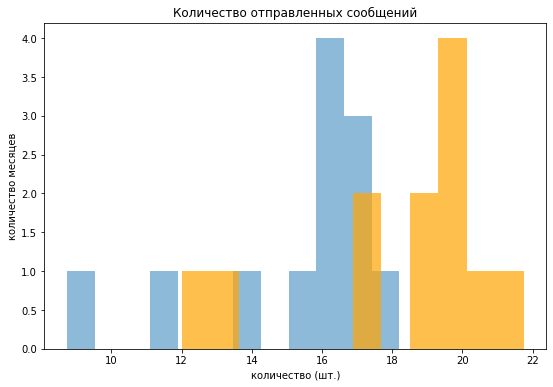

In [34]:
# построим гистограмму интернет-сессий в среднем по месяцам у абонентов двух тарифов

plt.figure(figsize=(9,6))
plt.title('Количество отправленных сообщений')
plt.xlabel('количество (шт.)')
plt.ylabel('количество месяцев')

plt.hist(smart['mean']['gb_used'],
        bins=12,
        alpha=.5
        )

plt.hist(ultra['mean']['gb_used'],
        bins=12,
        alpha=.7,
        color='orange'
        );

Таким образом мы видим, что абоненты тарифного плана **Смарт** (синий цвет) расходуют меньше интернета в месяц, чем абоненты **Ультра** (оранжевый цвет).
Видим, что обе гистограммы имеют датасет с небольшой отрицательнной скошенностью.

Подвидя итог, можем сказать, что абоненты тарифного плана **Ультра** значительно больше рассходуют свои тарифные-пакеты в месяц.
Также видим, опираясь на среднее значения в месяц, что практически все гистограммы имеют небольшую отрицательнную скошенность, следовательно и среднне значение меньше медианны.

**Дополнительно** я бы хотел предложить рассчитать данные за год, в нашем случае - это 2018 год, предлагаю найти среднее и стандартное отклоненние за год у тарифных планов, рассчитать диапазон 99% данных (по правилу 3 сигм):
* За год рассчитаем среднее и стандартное отклонение у:
* * количества звонков;
* * потраченных минут;
* * отправленных сообщений;
* * использованных ГБ;
* * полученного дохода.

Для этого обратимся снова к **good_data** и вычислим эти показатели

In [35]:
# рассчитаем среднее и стандартное за год по тарифам, и применим правило 3 сигм

# рассчитаем среднее у абонентов Смарт

mean_smart_calls = np.mean(good_data.query('tariff == "smart"')['count_duration'])
mean_smart_duration = np.mean(good_data.query('tariff == "smart"')['sum_duration'])
mean_smart_messages = np.mean(good_data.query('tariff == "smart"')['count_messages'])
mean_smart_internet = np.mean(good_data.query('tariff == "smart"')['gb_used'])
mean_smart_income = np.mean(good_data.query('tariff == "smart"')['income'])

# рассчитаем среднее у абонентов Ультра

mean_ultra_calls = np.mean(good_data.query('tariff == "ultra"')['count_duration'])
mean_ultra_duration = np.mean(good_data.query('tariff == "ultra"')['sum_duration'])
mean_ultra_messages = np.mean(good_data.query('tariff == "ultra"')['count_messages'])
mean_ultra_internet = np.mean(good_data.query('tariff == "ultra"')['gb_used'])
mean_ultra_income = np.mean(good_data.query('tariff == "ultra"')['income'])

# рассчитаем стандартное отклонение у абонентов Смарт с учетом выборке

std_smart_calls = np.std(good_data.query('tariff == "smart"')['count_duration'], ddof=1)
std_smart_duration = np.std(good_data.query('tariff == "smart"')['sum_duration'], ddof=1)
std_smart_messages = np.std(good_data.query('tariff == "smart"')['count_messages'], ddof=1)
std_smart_internet = np.std(good_data.query('tariff == "smart"')['gb_used'], ddof=1)
std_smart_income = np.std(good_data.query('tariff == "smart"')['income'], ddof=1)

# рассчитаем стандартное отклонение у абонентов Ультра с учетом выборке

std_ultra_calls = np.std(good_data.query('tariff == "ultra"')['count_duration'], ddof=1)
std_ultra_duration = np.std(good_data.query('tariff == "ultra"')['sum_duration'], ddof=1)
std_ultra_messages = np.std(good_data.query('tariff == "ultra"')['count_messages'], ddof=1)
std_ultra_internet = np.std(good_data.query('tariff == "ultra"')['gb_used'], ddof=1)
std_ultra_income = np.std(good_data.query('tariff == "ultra"')['income'], ddof=1)

**Рассчитаем дисперсию**

Рассчитаем дисперсию за год по тарифам и выведем на экран.

In [36]:
# рассчитаем дисперсию у абонентов Смарт с учетом выборке

var_smart_calls = np.var(good_data.query('tariff == "smart"')['count_duration'], ddof=1)
var_smart_duration = np.var(good_data.query('tariff == "smart"')['sum_duration'], ddof=1)
var_smart_messages = np.var(good_data.query('tariff == "smart"')['count_messages'], ddof=1)
var_smart_internet = np.var(good_data.query('tariff == "smart"')['gb_used'], ddof=1)
var_smart_income = np.var(good_data.query('tariff == "smart"')['income'], ddof=1)

# рассчитаем дисперсию у абонентов Ультра с учетом выборке

var_ultra_calls = np.var(good_data.query('tariff == "ultra"')['count_duration'], ddof=1)
var_ultra_duration = np.var(good_data.query('tariff == "ultra"')['sum_duration'], ddof=1)
var_ultra_messages = np.var(good_data.query('tariff == "ultra"')['count_messages'], ddof=1)
var_ultra_internet = np.var(good_data.query('tariff == "ultra"')['gb_used'], ddof=1)
var_ultra_income = np.var(good_data.query('tariff == "ultra"')['income'], ddof=1)

In [37]:
good_data.query('tariff == "smart"')['income'].describe().T


count    2229.000000
mean     1289.973531
std       818.404367
min       550.000000
25%       550.000000
50%      1023.000000
75%      1750.000000
max      6770.000000
Name: income, dtype: float64

In [38]:
# рассчитаем сколько абоненты тратят в среднем за месяц


print('''
Абоненты тарифного плана Смарт, в среднем в месяц расходуют:
{0} - совершают звонков;
{1} - тратят минут;
{2} - отправляют сообщений;
{3} - тратят Гб.;
{4} - приносят дохода.'''.format(int(mean_smart_calls), 
                           int(mean_smart_duration), 
                           int(mean_smart_messages), 
                           int(mean_smart_internet), 
                           int(mean_smart_income)))

print('''
Абоненты тарифного плана Ультра, в среднем в месяц расходуют:
{0} - совершают звонков;
{1} - тратят минут;
{2} - отправляют сообщений;
{3} - тратят Гб.;
{4} - приносят дохода.'''.format(int(mean_ultra_calls), 
                           int(mean_ultra_duration), 
                           int(mean_ultra_messages), 
                           int(mean_ultra_internet), 
                           int(mean_ultra_income)))





Абоненты тарифного плана Смарт, в среднем в месяц расходуют:
58 - совершают звонков;
417 - тратят минут;
33 - отправляют сообщений;
16 - тратят Гб.;
1289 - приносят дохода.

Абоненты тарифного плана Ультра, в среднем в месяц расходуют:
73 - совершают звонков;
526 - тратят минут;
49 - отправляют сообщений;
19 - тратят Гб.;
2070 - приносят дохода.


In [39]:
# расчитаем средний возраст абонентов

print('''

Средний возраст абонентов:
на тарифном плане "Смарт" составляет {0} лет,
а у тарифного плана "Ультра" составляет {1} лет.

'''.format(int(good_data.query('tariff == "smart"')['age_user'].median()),
          int(good_data.query('tariff == "ultra"')['age_user'].median()))
     
     
     )



Средний возраст абонентов:
на тарифном плане "Смарт" составляет 47 лет,
а у тарифного плана "Ультра" составляет 45 лет.




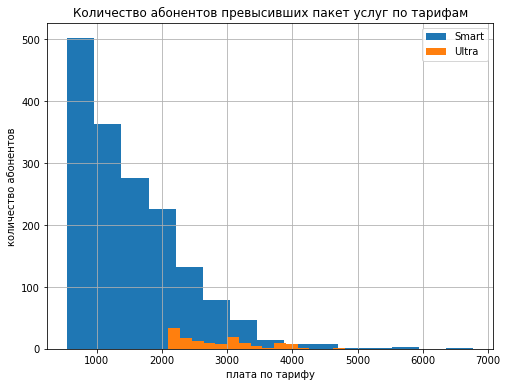



у тарифного плана "Смарт" 1662 раз абоненты выходили за рамки тарифа;
у тарифного плана "Ультра" 134 раз абоненты выходили за рамки тарифа.




In [40]:
# построим гистограмму по абонентам превысившим абон плату

plt.figure(figsize=(8, 6))
good_data.query('tariff == "smart" and income > 550')['income'].hist(bins=15, label='Smart')
good_data.query('tariff == "ultra" and income > 1950')['income'].hist(bins=15, label='Ultra')
plt.title('Количество абонентов превысивших пакет услуг по тарифам')
plt.legend()
plt.xlabel('плата по тарифу')
plt.ylabel('количество абонентов')
plt.show();

# рассчитаем какая группа пользователь чаще выходит за рамки абонентской платы

print('''

у тарифного плана "Смарт" {0} раз абоненты выходили за рамки тарифа;
у тарифного плана "Ультра" {1} раз абоненты выходили за рамки тарифа.

'''.format(len(good_data.query('tariff == "smart" and income > 550')),
           len(good_data.query('tariff == "ultra" and income > 1950'))
          
          )
      )


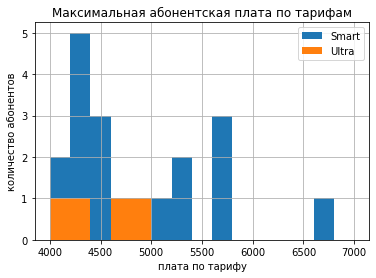

In [41]:
# построим гистограмму максимальной абон платы


good_data.query('tariff == "smart" and income > 550')['income'].hist(bins=15, label='Smart', range=(4000, 7000))
good_data.query('tariff == "ultra" and income > 1950')['income'].hist(bins=15, label='Ultra', range=(4000, 7000))
plt.title('Максимальная абонентская плата по тарифам')
plt.legend()
plt.xlabel('плата по тарифу')
plt.ylabel('количество абонентов')
plt.show();

### Итог анализа данных

Мы провели анализ данных и выяснили, что большая часть абонентов проживает в **Москве** или **Санкт-Петербурге**.
**70%** из выборке пользуются тарифом "Смарт", а остальные "Ультра".
Возраст абонентов у тарифов схожий и находится в диапазоне **18**-**75** лет, также средний возраст абонентов практически совпадает у обоих тарифов и составляет **45-47** лет.

Абонентов **Смарт** больше примерно в 2,5 раза чем абонентов **Ультра** стоит учитывать это. 

В среднем в месяц абоненты **Ультра** приносят **2 070 рублей** дохода, 

а абоненты **Смарт** около **1 289 рублей** в месяц. 

Но в тоже время мы видим, что абоненты тарифа **Смарт** чаще выходят за рамки тарифа, в отличии от абонентов тарифа **Ультра**.
К тому же максимальная сумма абонентской плату у абонентов **Смарт** составляла чуть больше **6 500** рублей, в то время как у **Ультры** максимум до **5 000** рублей. 

Абоненты **Смарт** не только чаще выходят за рамки своего тарифа, но и доход от них выше чем от абонентов **Ультра**



## 4. Проверка гипотез

Заказчик дополнительнно попросил нас проверить две гипотезы, которые звучат так:
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.


Нам предстоить проверить 2 гипотезы, но для начала давайте их сформулируем:

1. 


* * H₀ - средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается, выручки **равны**;
* * H₁ - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается, выручки **не равны**.


2.
* * H₀ - средняя выручка пользователей из Москвы и пользователей из других регионов не различается, выручки **равны**;
* * H₁ - средняя выручка пользователей из Москвы и пользователей из других регионов различается, выручки **не равны**.

Обе наших гипотезы являются двухсторонними, поэтому предлагаю пороговое значение **alpha** = **5%**.  

Нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства. Другими словами, чтобы все данные лежали в районе изначально предполагаемого значения.


**Давайте проверим гипотезу №1**

* * H₀ - средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается, выручки **равны**;
* * H₁ - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается, выручки **не равны**.
 
Запишем иначе:
* **U** - средняя выручка пользователей тарифа «Ультра»;
* **S** - средняя выручка пользователей тарифа «Смарт».

Таким образов, получаем:
* **H₀**: U = S - нулевая гипотеза;
* **H₁**: U ≠ S - альтернативная гипотеза.

В данной гипотезе мы будем сравнивать выборки из двух генеральных совокупностей:
* выборка выручки абонентов тарифа «Ультра», и
* выборка выручки абонентов тарифа «Смарт».

Ранее мы выяснили, что доля абонентов тарифа «Ультра» около **30%**, также мы знаем, что этот тарифный план дороже по абонентской плате. Ранее мы выяснили, что приблизительно средний возраст абонентов составляет **45-47** лет. Нам нужно определиться, стоит ли при проверке гипотезы считать ли равными дисперсии выборок.

Проверим их размер.

In [42]:
# создадим два массива по этим тарифам, подсчитаем их количество

array_smart = (
    good_data
    .query('tariff == "smart"')['income']
             )

array_ultra = (
    good_data
    .query('tariff == "ultra"')['income']
             )

# сделаем их массивами Numpy

array_smart = np.array(array_smart)
array_ultra = np.array(array_ultra)

print('''
Размер выборки по тарифам "Смарт" равняется {0},
а размер выборки по тарифу "Ультра" равняется {1}.
'''.format(len(array_smart), len(array_ultra))
     )


Размер выборки по тарифам "Смарт" равняется 2229,
а размер выборки по тарифу "Ультра" равняется 985.



In [43]:
print('''

дисперия для массива "Smart" составляет: {0};
дисперия для массива "Ultra" составляет: {1};

'''.format(int(np.var(array_smart)), 
           int(np.var(array_ultra))
          )
     )



дисперия для массива "Smart" составляет: 669485;
дисперия для массива "Ultra" составляет: 141373;




Видим, что выборки разных размеров почти в 2 раза одна из них больше, плюс доход по тарифным планам различается, абонентская плата у тариа "Ультра" больше. 

К тому же выше мы рассчитали дисперсии для этих двух выборок отдельно и видим, что они очень сильно отличаются.

Исходя из вышесказанного при проверке гипотезы мы не будем считать дисперсии выборок равными. 

In [44]:
# давайте проверим 1 гипотезу
# H₀: U = S - нулевая гипотеза
# H₁: U ≠ S - альтернативная гипотеза
# где: 
# U - средняя выручка пользователей тарифа «Ультра»
# S - средняя выручка пользователей тарифа «Смарт»

alpha = .05   # критический уровень статистической значимости

results = st.ttest_ind(array_smart, array_ultra, equal_var=False)

print('р-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


р-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


Таким образом средняя выручка пользователей тарифов «Ультра» и «Смарт» различается, выручки **не равны**. 


**Давайте проверим гипотезу №2**

* * H₀ - средняя выручка пользователей из Москвы и пользователей из других регионов не различается, выручки **равны**;
* * H₁ - средняя выручка пользователей из Москвы и пользователей из других регионов различается, выручки **не равны**.
 
Запишем иначе:
* **M** - средняя выручка пользователей из Москвы;
* **O** - средняя выручка пользователей из других регионов.

Таким образов, получаем:
* **H₀**: M = O - нулевая гипотеза;
* **H₁**: M ≠ O - альтернативная гипотеза.

В данной гипотезе мы будем сравнивать выборки из двух генеральных совокупностей:
* средняя выручка пользователей из Москвы;
* средняя выручка пользователей из других регионов.



In [45]:
# создадим два массива по городам, подсчитаем их количество

array_moscow = (
    good_data
    .query('city == "Москва"')['income']
             )

array_other = (
    good_data
    .query('city != "Москва"')['income']
             )

# сделаем их массивами Numpy

array_moscow = np.array(array_moscow)
array_other = np.array(array_other)

print('''
Размер выборки по Москве равняется {0},
а размер выборки по другим регионам равняется {1}.
'''.format(len(array_moscow), len(array_other))
     )


Размер выборки по Москве равняется 611,
а размер выборки по другим регионам равняется 2603.



Опять же и тут разный размер выборок, поэтому и в проверке этой гипотезы мы не будем считать дисперсии выборок равными.

In [46]:
# давайте проверим 2 гипотезу
# H₀: M = O - нулевая гипотеза
# H₁: M ≠ O - альтернативная гипотеза
# где: 
# M - средняя выручка пользователей из Москвы;
# O - средняя выручка пользователей из других регионов.

alpha = .05   # критический уровень статистической значимости

results = st.ttest_ind(array_moscow, array_other, equal_var=False)

print('р-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

р-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


При проверку второй гипотезы, мы можем сказать, что средняя выручка пользователей из Москвы и пользователей различается в **~52%** случаев.

### Дополнительно:

целью исследования является подсказать, какой из двух тарифов лучше, проверя 2 гипотезы, мы выяснили, что выручки между тарифов различаются и что выручка пользователей из Москвы сравнима с вырочкой пользователей из других регионов. Но у нас остался еще один вопрос, какой из тарифов все же выгоднее, давайте дополнительно проверим еще одну из гипотез:

**Давайте проверим гипотезу №3**

* * H₀ - средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается, выручки **равны**;
* * H₁ - средняя выручка пользователей тарифа «Ультра» **больше** чем средняя выручка пользователей тарифа «Смарт».
 
Запишем иначе:
* **U** - средняя выручка пользователей тарифа «Ультра»;
* **S** - средняя выручка пользователей тарифа «Смарт».

Таким образов, получаем:
* **H₀**: U = S - нулевая гипотеза;
* **H₁**: U > S - альтернативная гипотеза.

В данной гипотезе мы будем сравнивать выборки из двух генеральных совокупностей:
* выборка выручки абонентов тарифа «Ультра», и
* выборка выручки абонентов тарифа «Смарт».

In [47]:
# давайте проверим 3 гипотезу
# H₀: U = S - нулевая гипотеза
# H₁: U > S - альтернативная гипотеза
# где: 
# U - средняя выручка пользователей тарифа «Ультра»
# S - средняя выручка пользователей тарифа «Смарт»

alpha = .05   # критический уровень статистической значимости


results = st.ttest_1samp(array_smart, mean_ultra_income)

print('р-значение:', results.pvalue / 2)

if (results.pvalue / 2 < alpha) and (array_smart.mean() < mean_ultra_income):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


р-значение: 1.681759983e-315
Отвергаем нулевую гипотезу


**Таким образом мы выяснили, что средняя выручка абонентов тарифа «Ультра» больше по сравнениюя со средней выручкой абонентов тарифа «Смарт».**

## Общий вывод

Мы изучили поведения абонентов «Мегалайн» — федерального оператора сотовой связи на выборке из **500** человек за 2018 год.

В самом начале оператор нам преставил данные хранящиеся в **5** датафреймах, которые объединялись между собой столбцом `user_id`, по которому мы собрали новый датафрейм **good_data** в который вошли сгруппирированные данные по абонентам и их расходам пакет-услуг по-месячно. 

Округлили данные по минутам и интернет-сессиям в соответствии с требованием мобильного оператора. 

Также рассчитали ежемесячный доход по каждому абоненту с учетом его потребления покетов услуг по тарифу. 

В **good_data** все данные привели к нужным нам типам, проверили данные на аномалии, также удалили все звонки, которые длились **0** минут - оператор пояснил, что это пропущенные звонки. 

Таким образом датафрейм **good_data** мы подготовили для анализа. 

При проведении анализа мы выяснили, что:

* доля абонентов тарифа "Смарт" составляет **70%** (350 человек) от выборке, а остаток это абоненты тарифа "Ультра" - **30%** (148 человек); * 2 абонента у нас отсеялись из-за того, что они не пользовались пакетами услуг;
* большая часть абонентов компании «Мегалайн» проживает в Москве и Санкт-Петербурге;
* возраст абонентов у тарифов схожий и находится в диапазоне **18**-**75** лет, также средний возраст абонентов практически совпадает у обоих тарифов и составляет **45-47** лет;
* Абоненты тарифного плана **Смарт**, в среднем в месяц расходуют:
* * 46 - совершают звонков;
* * 417 - тратят минут;
* * 33 - отправляют сообщений;
* * 16 - тратят Гб.;
* * 1289 - приносят дохода.
* Абоненты тарифного плана **Ультра**, в среднем в месяц расходуют:
* * 59 - совершают звонков;
* * 526 - тратят минут;
* * 49 - отправляют сообщений;
* * 19 - тратят Гб.;
* * 2070 - приносят дохода.
* **Далее** мы проверили 3 гипотезы и выяснили следующее:
* * средняя выручка пользователей тарифов «Ультра» и «Смарт» различается, выручки **не равны**, выручка пользователей тарифов «Ультра» **больше**.
* * средняя выручка пользователей из Москвы и пользователей из других регионов не различается, выручки **равны**.

Таким образом абоненты тарифного плана "Ультра" приносят больше выручки, но и тратят больше пакетов услуг, к тому же доля их значительно меньше, чем абонентов тарифного плана "Смарт".

**Исследование закончен!**